#### Seasonal Auto Regrerssive Integrated Moving Average with eXogenous regressor model

###### Analyzing the daily bike demand in (a city), provided by (source ofdataset). The data looks at the hourly renting count, the weather conditions and xy over from (date1) to (date2).

### Exploratory Analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [3]:
df = pd.read_csv("../data/train.csv", index_col=0, parse_dates=True)
test = pd.read_csv("../data/test.csv", index_col=0, parse_dates=True)
df = df.copy(deep=True)

In [4]:
df.duplicated().sum()

21

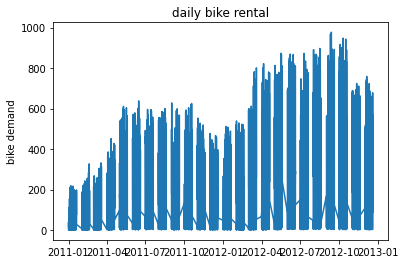

In [5]:
plt.plot(df.index, df['count'])
plt.title('daily bike rental')
plt.ylabel('bike demand')
plt.show()

<AxesSubplot:xlabel='datetime'>

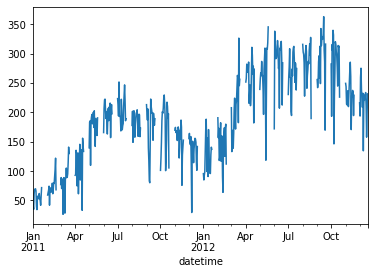

In [6]:
df.resample('D')['count'].mean().plot()

c:\Users\power\anaconda3\envs\your_project_name\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Attempting to set identical left == right == 493 results in singular transformations; automatically expanding.
  


(468.35, 517.65)

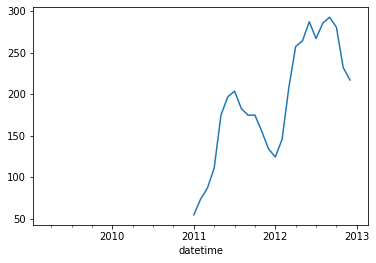

In [7]:
df.resample('M')['count'].mean().plot()
plt.xlim(('2011-02-02 00:00:00', '2011-02-03 00:00:00'))

###### We can see a clear anual seasonality pattern as well as an upward trend within the years.

In [8]:
def add_time_features(df):
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["week"] = df.index.week
    df["day"] = df.index.day
    df["hour"] = df.index.hour
 
    df['DayOfWeek'] = df.index.dayofweek
    df['Quarter'] = df.index.quarter
    df['DayOfYear'] = df.index.dayofyear
    df['WeekOfYear'] = df.index.weekofyear
    return df

In [9]:
add_time_features(df)

c:\Users\power\anaconda3\envs\your_project_name\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.
c:\Users\power\anaconda3\envs\your_project_name\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,week,day,hour,DayOfWeek,Quarter,DayOfYear,WeekOfYear
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,52,1,0,5,1,1,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,52,1,1,5,1,1,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,52,1,2,5,1,1,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,52,1,3,5,1,1,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,52,1,4,5,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,51,19,19,2,4,354,51
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,51,19,20,2,4,354,51
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,51,19,21,2,4,354,51


In [10]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,week,day,hour,DayOfWeek,Quarter,DayOfYear,WeekOfYear
datetime,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,52,1,0,5,1,1,52
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,52,1,1,5,1,1,52
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,52,1,2,5,1,1,52
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,52,1,3,5,1,1,52
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,52,1,4,5,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,51,19,19,2,4,354,51
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,51,19,20,2,4,354,51
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,51,19,21,2,4,354,51


In [18]:
def get_graph(df, fig_name):

    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(30,15)
    dow_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
    mon_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


    sns.barplot(data = df, x="year", y="count", ax = axes[0,0])
    sns.barplot(data = df, x="month", y="count", ax = axes[0,1]).set_xticklabels(mon_labels)
    sns.pointplot(data = df, x="hour", y="count", ax = axes[1,0], hue = "DayOfWeek")
    sns.pointplot(data = df, x="DayOfWeek", y="count", ax = axes[1,1], hue = "year").set_xticklabels(dow_labels)
    fig.savefig(fig_name)
    fig.show()

c:\Users\power\anaconda3\envs\your_project_name\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


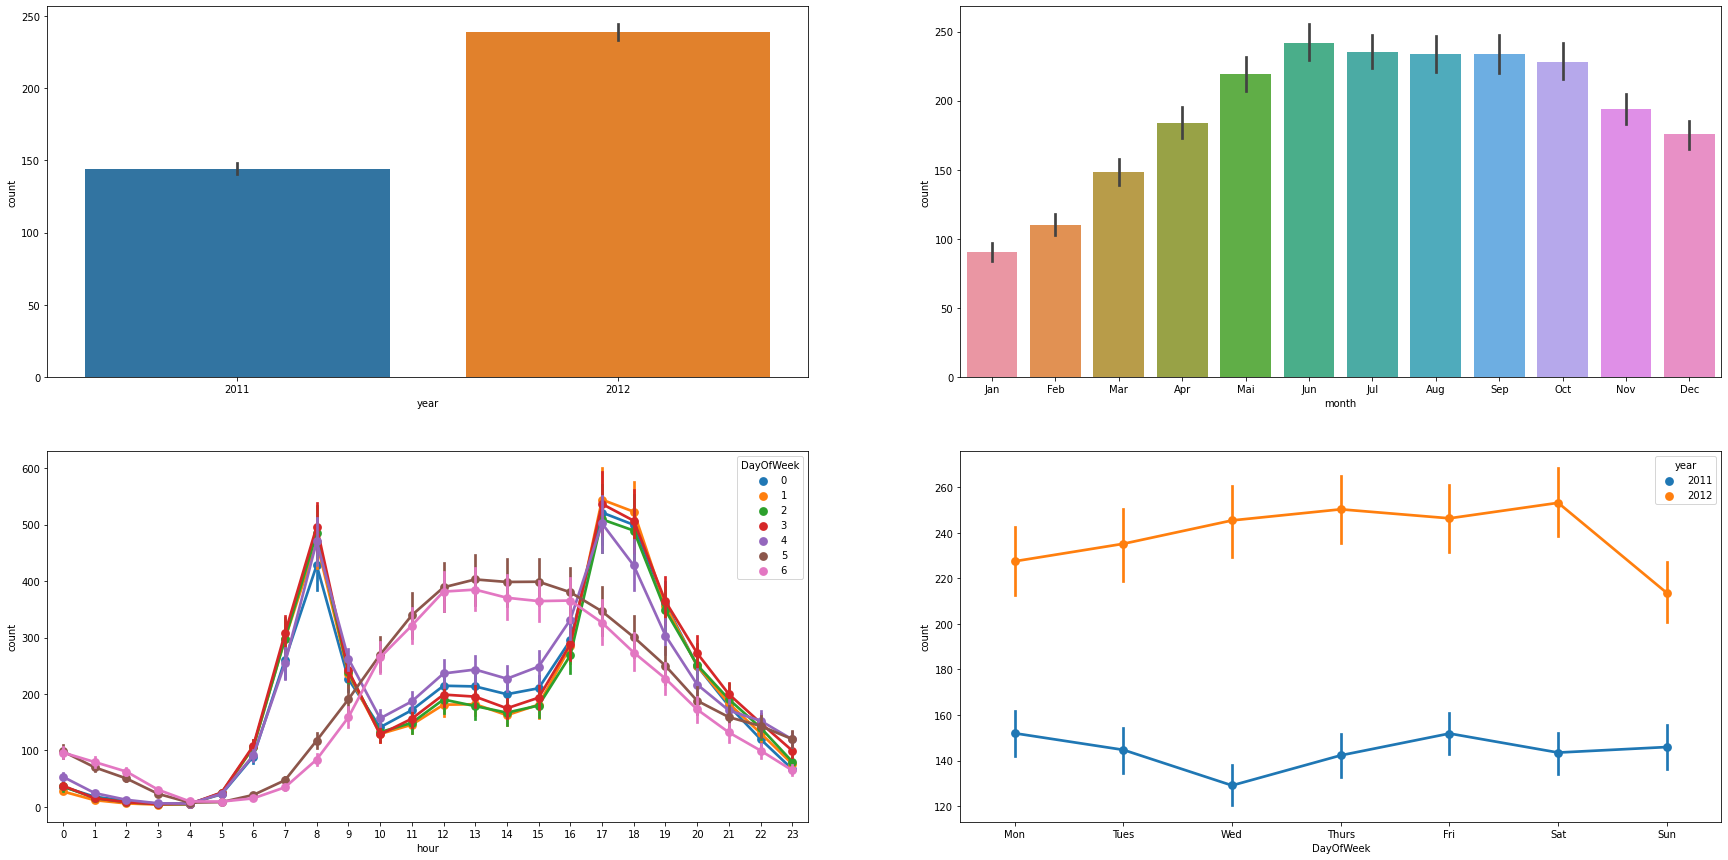

In [19]:
get_graph(df, "eda_plots")

In [ ]:
# def get_graphs(df, yvalue):
#     fig, axes = plt.subplots(2, 2, figsize=(10,5))
#     dow_labels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

#     # Hour of Day
#     g = sns.boxplot(x=df.hour, y=yvalue, ax=axes[0][0])
#     g.set_ylabel('')
    
#     # Day of Week
#     g = sns.boxplot(x=df.DayOfWeek, y=yvalue, ax=axes[0][1])
#     g.set_xticklabels(dow_labels)
#     g.set_ylabel('')

#     # Month of Year
#     g = sns.boxplot(x=df.month, y=yvalue, ax=axes[1][0])
#     g.set_ylabel('')
    
#     # Year
#     g = sns.boxplot(x=df.year, y=yvalue, ax=axes[1][1])
#     g.set_ylabel('')

In [ ]:
#get_graphs(df, df["count"])

In [ ]:
#get_graphs(df, df["casual"])

- Casual bike renters use the bikes from 7am increasingly throughout the day with peak times between 2-5 pm, declining until midnight. 
- They use them throughout the whole week, but especially on the weekend
- There is a seasonal preference to rend the bikes, from april to october.
- In 2012 the demand increased compared to the year before. 

In [ ]:
#get_graphs(df, df["registered"])

- registered bike renters use the bikes from 6am throughout the day with two peak times. In the morning from 7-8 am and in the afternoon from 5-6 pm. 
- The demand is similar throughout the whole week 
- The bikes are used throughout the year, mostly though in the months from mai till december.
- In 2012 the demand increased compared to the year before. 

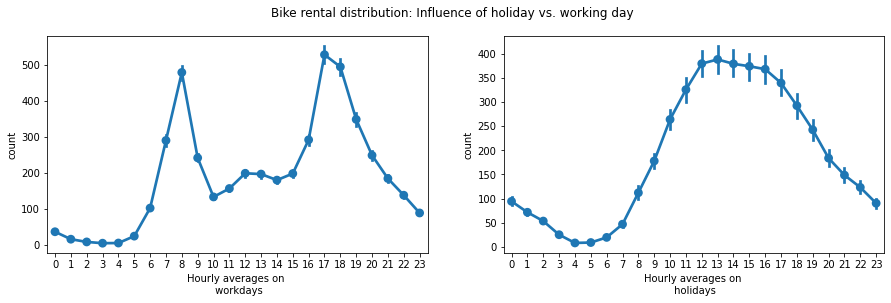

In [38]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(15,4)

weekday_df = df[df['workingday'] == 1]
holiday_df = df[df['workingday'] == 0]

sns.pointplot(data = weekday_df, x="hour", y="count", ax = axes[0])
sns.pointplot(data = holiday_df, x="hour", y="count", ax = axes[1])
plt.suptitle('Bike rental distribution: Influence of holiday vs. working day')
axes[0].set_xlabel('Hourly averages on workdays')
axes[1].set_xlabel('Hourly averages on holidays')

fig.savefig("Bike_rental_distribution_holiday_working_day.png")

- on holidays the bike demand ist peaking 12am to 4pm for all of the users.

summary
###### DAILY: during the week there are two peaks of bike demand, one in the morning and one in the afternoon. on weekend the bikes are mainly used during the day, with a peak in noon/early afternoon. On holidays there is only one peak of bike demand during the day, similar to the weekend distribution. 
###### MONTHLY: During the year the bike demand in the individual months is slightly different between registered users and casual users. The first use the bikes all year around, mainly from mai till december, the latter use the bikes far less (lower toal number), but mainly from april till october.
###### YEARLY: There is an inrease in demand visible from 2011 to 2012

In [ ]:
# X_train['hour_cos'] = np.cos(2 * math.pi * X_train['hour'] / X_train['hour'].max())
# X_train['hour_sin'] = np.sin(2 * math.pi * X_train['hour']/24)

# X_train['month_sin'] = np.sin(2 * math.pi  * X_train.index.month/12)
# X_train['month_cos'] = np.cos(2 * math.pi  * X_train.index.month/12)


# #X_test
# X_test['hour_cos'] = np.cos(2 * math.pi * X_test['hour'] / X_test['hour'].max())
# X_test['hour_sin'] = np.sin(2 * math.pi * X_test['hour']/24)

# X_test['month_sin'] = np.sin(2 * math.pi  * X_test.index.month/12)
# X_test['month_cos'] = np.cos(2 * math.pi  * X_test.index.month/12)

# Split Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
# Define our independent variable/ initial features
X = df.drop(['registered', 'casual', 'count'], axis=1) 
# Define output target variable
y = df['count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 17), (2722, 17), (8164,), (2722,))

# Preprocessing the data

c:\Users\power\anaconda3\envs\your_project_name\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

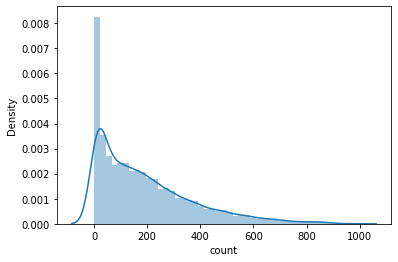

In [ ]:
sns.distplot(df["count"])
# data is presenting a left skew
# to remove the skewness, apply log'

In [ ]:
df["count"] = np.log1p(df["count"])

# y_train = np.log1p(y_train)
# y_test = np.log1p(y_test)

c:\Users\power\anaconda3\envs\your_project_name\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

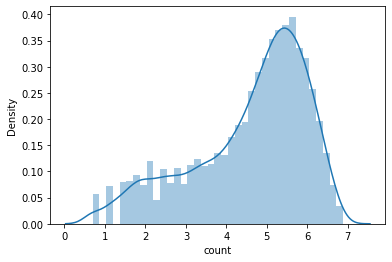

In [ ]:
sns.distplot(df["count"])
# sns.distplot(y_train)
# sns.distplot(y_test)

c:\Users\power\anaconda3\envs\your_project_name\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='count'>

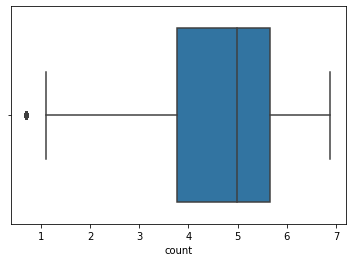

In [ ]:
# sns.boxplot(df["count"])
sns.boxplot(df["count"])

In [ ]:
# Remove the outliers (that have a residual < stdev*3)
df = df[np.abs(df["count"])-df["count"].mean()<=(3*df["count"].std())]

c:\Users\power\anaconda3\envs\your_project_name\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='count'>

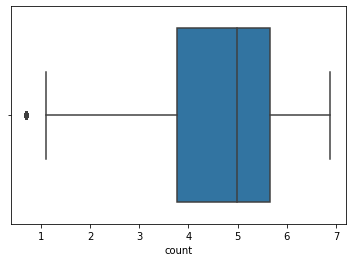

In [ ]:
sns.boxplot(df["count"])

In [ ]:
df_num = df[['temp', 'atemp', 'humidity', 'windspeed']]

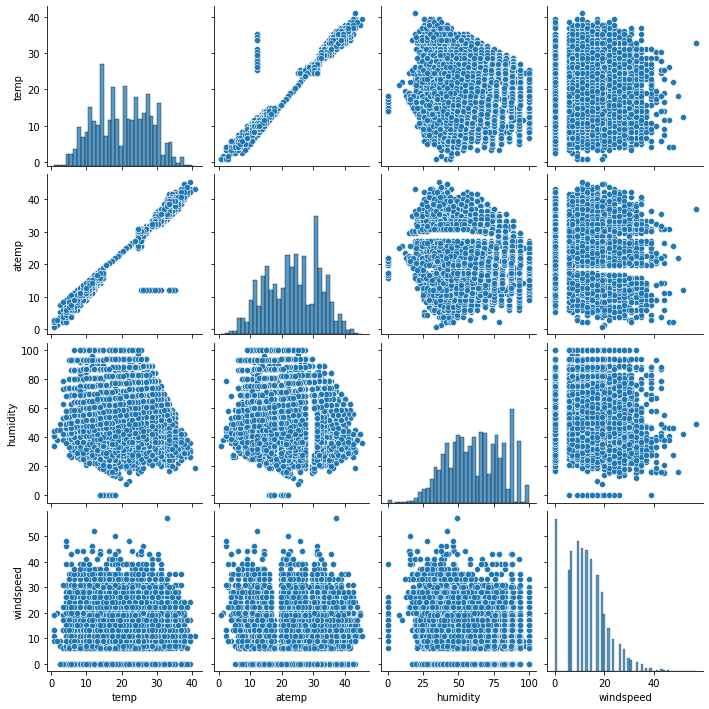

In [ ]:
sns.pairplot(df_num)

# Feature engineering

In [ ]:
#!pip install statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
ANNUAL_PERIOD = 365*24
mult_decomp = seasonal_decompose(df['count'], model='multiplicative', extrapolate_trend='freq', period=ANNUAL_PERIOD)
mult_decomp.plot()
plt.show()

ValueError: x must have 2 complete cycles requires 17520 observations. x only has 10886 observation(s)